# Random walks with infection

---

so this is a model I made after I found one  that I found googling [carole adams](https://www.liglab.fr/fr/membre/carole-adam)

- the world is modeled as a grid just like  in a [platform game](https://eloquentjavascript.net/16_game.html) 
- I make a grid from this which contains a dictionary key to the transitions possible from a position

I used to write platform games in the early 2000s using Flash/Actionscript so I know how to do this.

Actually grids and coding walls into them  goes back to [rogue](https://en.wikipedia.org/wiki/Rogue_(video_game)#User_interface)

Here is a [tuto](http://rogueliketutorials.com/) in *simple* Python.

- I learned to program in Basic/C so I use a lot of tricks
- because I hate nested loops


---

## Grid

I wrapped the game board in a  class called ```Grid``` because 

- it's easier to debug as the names and methods aren't global
- here is a stub of the API


```
class Grid():
    
    def __init__(self, *args):
        initialise the grid with the border walls
        call self.mk_moves
        
    def get_blank(self):
        #make a blank copy of the grid without boundary walls
        return np.zeros_like(self.X)
                
    def mk_moves(self):
        calculate the valid moves for each position on the grid
        store as private attributes 


    def get_move(self, pos):
        #expose private attributes
        return  valid move   
    
```
            
          
---

### The loop

The simulation is a loop which is easy to port to another framework ie
- pygame
- tkinter

This is an important feature of **good** programming:
- it should be independant of the output device 
- data should be abstract/rich enough to be translated to other formats



### Here's the meta code



```
initialise everything

for _ in simulation duration:
    make a blank grid
    for each agent:
        draw the agent into the grid
        update the position of the agent
    save the state of the simulation
    
    for some agents:  
        determine interactions which change the state of an agent
        update the state of the agent if necessary

    
```

---

## Determining interactions

An interaction usually occurs during a *collision* between agents.
I implemented two different collision detection methods
- computing distance using [scipy.spatial.distance_matrix]()
- checking in a small box around the agents for other agents

### Advantages/disadvantages

- the first method can be useful if there are long distance interactions but is computationally expensive
- the second method is **cheap** but you have to clip the box if the agent is at the edge of the grid



---




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random

from scipy import signal


import  matplotlib.animation

from matplotlib import animation

from IPython.display import HTML
def plot_images(img_list, fr=100):
    
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig,
                                 animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=fr, 
                                 blit=True)
  return anim

# use like this
#HTML(plot_images(imgs).to_html5_video())

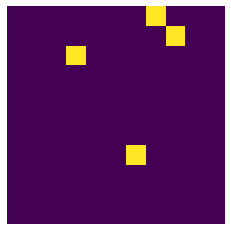

In [2]:
sz = 10

S = np.zeros((sz+1,sz+1),dtype=int)
S[:,0] = 1
S[0,:] += 2
S[sz,:] += 4
S[:,sz] += 7


diffs = [[1,0],[0,1],[-1,0],[0,-1]]

nogo = {0: [], 
        1: [3], 2: [2], 7: [1], 4: [0],
        5: [0,3], 9: [1,2],
        3: [2,3], 11:[0,1]
}

moves = {x:  [ y for k,y in enumerate(diffs) if k not in  nogo[x]] for x in nogo}

G = np.zeros((sz+1,sz+1))

pts = [ np.array([k,k],dtype=int) for k in range(2,sz,2)]
             
frames = []
for _ in range(200):
    G = np.zeros((sz+1,sz+1))
    for pt in pts:
        G[tuple(pt)] = 1
        #print(tuple(pts),S[tuple(pts)])
    
        pt += random.choice(moves[S[tuple(pt)]])
    
    frames.append(np.copy(G))

HTML(plot_images(frames, fr=100).to_html5_video()) 


In [16]:
! ../.g

[master 42c9df5] web
 3 files changed, 1864 insertions(+), 1805 deletions(-)
Counting objects: 6, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 4.69 MiB | 3.12 MiB/s, done.
Total 6 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
remote: warning: See http://git.io/iEPt8g for more information.
remote: warning: File tags is 76.58 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/macbuse/macbuse.github.io.git
   5a1ed3f..42c9df5  master -> master


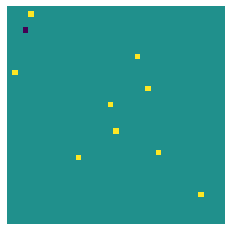

In [3]:
sz = 40
W =  np.zeros((sz+1,sz+1),dtype=int)
        #place the walls
W[:,0] = W[0,:] = W[sz,:] = W[:,sz] = 1
        

        # make a kernel
K = [0,1,0,2,0,8,0,4,0]
K = np.array(K).reshape(3,3)

        #these are the forbidden transitions for the states
forbidden = {0: [], 
                8: [3], 4: [2], 2: [1], 1: [0],
                9: [0,3], 6: [1,2],
                12: [2,3], 3:[0,1]
        }


        # calculate the states for the grid
X = signal.convolve2d( W, K)[2:-2,2:-2]

        #apparently these get cast to np.array when I add???
diffs = [[1,0],[0,1],[-1,0],[0,-1]]

allowed_moves = {}
for x in forbidden:
    allowed_moves[x] =  [ y for k,y in enumerate(diffs)
                                     if k not in  forbidden[x]] 
    
def get_move( pos):
    #globals is not good
    return random.choice(allowed_moves[X[pos]])
        
        
G = np.zeros_like(X) + 6
#initial configuration
pts = np.array([ np.array([k, k],dtype=int) for k in range(2, sz, 4)])
cols = np.array([ k%8 + 1 for k in range(2, sz, 4)])
             
frames = []
for _ in range(200):
    G = np.zeros((sz+1,sz+1)) + 5
    for pt,col in zip(pts,cols):
        pos = tuple(pt[:2])
        G[pos] = col
        pt += get_move(pos)
    
    # this is a bit of a hack to reduce computations
    Z = scipy.spatial.distance_matrix(pts[cols==3], pts[cols==7], p=np.infty)
    uninfected = np.where(cols==3)[0]
    uninfected_collisions = uninfected[np.any(Z < .5, axis = 1)]
    cols[uninfected_collisions ] = 7
    
    frames.append(np.copy(G))

HTML(plot_images(frames, fr=100).to_html5_video()) 


In [5]:

class Grid():
    
    def __init__(self, sz = 40):
        self.sz = sz
        W =  np.zeros((sz+1,sz+1),dtype=int)
        #place the walls
        W[:,0] = W[0,:] = W[sz,:] = W[:,sz] = 1
        
        #expose this so that you can add extra walls
        #some would say I should not expose W but...
        self.W = W
        self.mk_moves()
        
    def get_blank(self):
        return np.zeros_like(self.X)
        
        
    def mk_moves(self):
        # you can rewrite this without using the convolution
        
            # mke a kernel
            K = [0,1,0,2,0,8,0,4,0]
            K = np.array(K).reshape(3,3)

            #these are the forbidden transitions for the states
            forbidden = {0: [], 
                    8: [3], 4: [2], 2: [1], 1: [0],
                    9: [0,3], 6: [1,2],
                    12: [2,3], 3:[0,1]
            }

            # calculate the states for the grid
            self.X = signal.convolve2d(self.W, K)[2:-2,2:-2]

            #apparently these get cast to np.array when I add???
            diffs = [[1,0],[0,1],[-1,0],[0,-1]]

            allowed_moves = {}
            for x in forbidden:
                allowed_moves[x] =  [ y for k,y in enumerate(diffs)
                                         if k not in  forbidden[x]] 
            #expose to the user
            self.allowed_moves = allowed_moves
    
    def get_move(self, pos):
        return random.choice(self.allowed_moves[self.X[pos]])
        
    
GG = Grid()      
            
G = np.zeros_like(GG.X) + 6
#initial configuration
sz = G.shape[0]
pts = np.array([ np.array([k, k],dtype=int) for k in range(2, sz, 4)])
cols = np.array([ k%8 + 1 for k in range(2, sz, 4)])
             
frames = []
for _ in range(200):
    G = GG.get_blank() + 5
    for pt,col in zip(pts,cols):
        pos = tuple(pt[:2])
        G[pos] = col
        pt += GG.get_move(pos)
    
    # this is a bit of a hack to reduce computations
    Z = scipy.spatial.distance_matrix(pts[cols==3], pts[cols==7], p=np.infty)
    uninfected = np.where(cols==3)[0]
    uninfected_collisions = uninfected[np.any(Z < .5, axis = 1)]
    cols[uninfected_collisions ] = 7
    
    frames.append(np.copy(G))



In [18]:
import numpy as np

K = [0,1,0,2,0,8,0,4,0]
K = np.array(K).reshape(3,3)
K

array([[0, 1, 0],
       [2, 0, 8],
       [0, 4, 0]])

In [21]:
GG.X

array([[12,  4,  4, ...,  4,  4,  6],
       [ 8,  0,  0, ...,  0,  0,  2],
       [ 8,  0,  0, ...,  0,  0,  2],
       ...,
       [ 8,  0,  0, ...,  0,  0,  2],
       [ 8,  0,  0, ...,  0,  0,  2],
       [ 9,  1,  1, ...,  1,  1,  3]])

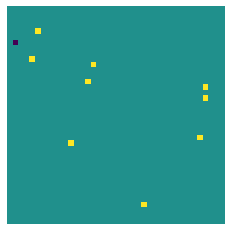

In [20]:
raw_anim = plot_images(frames, fr=100)
HTML(raw_anim.to_html5_video()) 

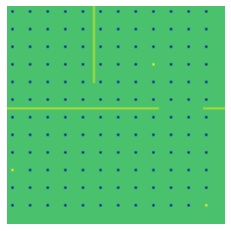

In [10]:
def clip(x):
    # don't look outside the box
    # sz is global
    if x < 0 : return 0
    if x > sz :return sz
    return x

sz = 100
world  = Grid(sz=sz)
world.W[47] = 1
world.W[47,70:90] = 0
world.W[:36,40] = 1
world.mk_moves()

sz -= 2
            
#initial configuration evenly spaced
pp = []
for j in range(2, sz,8):
    for k in range(2, sz,8):
        pp.append( np.array([j,k],dtype=int) )
        
pts = np.array(pp)
#choose who is infected
cols = np.zeros(len(pp))
cols[44] = cols[-36] =  cols[-1] = 7
      
frames = []
dd = []
for k in range(1):
    frame = world.get_blank() + 5
    for pt,color in zip(pts,cols):
        pos = tuple(pt)
        frame[pos] = color
        pt += world.get_move(pos)
    
    #should be amethod
    frames.append(frame + world.W[1:-1,1:-1])
    #count infected
    dd.append(len(cols[cols>5]))
    # I have to recalculate this every time  
    #maybe I should just delete the infected ???
    for _ in np.where(cols == 0)[0]:
        x, y = pts[_]
        neighbors = frame[clip(x-1):clip(x+2), clip(y-1):clip(y+2) ]
        if np.max(neighbors) > 5:
            cols[_] = 7
 

if True:
    raw_anim = plot_images(frames, fr=100)
    #raw_anim.save('random_epi.gif', writer='imagemagick', fps=10)
else:
    plt.plot(dd);  # symmetric


In [14]:
raw_anim.save('random_epix.gif', writer='imagemagick', fps=10)

In [9]:
np.max(frame)

7

In [656]:
HTML(raw_anim.to_html5_video()) 

In [63]:


def dd2bin(x):
    pp = []
    while x > 0:
        pp.append(x % 2 )
        x //= 2
    return pp

int2bin = {k : dd2bin(k) for k in range(16)}



class Grid():
        
    
    def __init__(self, sz = 40):
        self.sz = sz
        W =  np.zeros((sz+1,sz+1),dtype=int)
        #place the walls
        W[:,0] = W[0,:] = W[sz,:] = W[:,sz] = 1
        
        #expose this so that you can add extra walls
        #some would say I should not expose W but...
        self.W = W
        self.mk_moves()
        
    def get_blank(self):
        return np.zeros_like(self.X)
        
        
    def mk_moves(self):
        # you can rewrite this without using the convolution
        
            # mke a kernel
            K = [0,1,0,2,0,8,0,4,0]
            K = np.array(K).reshape(3,3)

            #these are the forbidden transitions for the states
            # calculate the states for the grid
            self.X = signal.convolve2d(1 - self.W, K)[2:-2,2:-2]

            #apparently these get cast to np.array when I add???
            diffs = [[1,0],[0,1],[-1,0],[0,-1]]
            
            self.allowed_moves = {x : [diff for k, diff in zip(int2bin[x],diffs) if k >0 ] 
                              for x in range(16)}

    
    def get_move(self, pos):
        return self.allowed_moves[self.X[pos]]

        return random.choice(self.allowed_moves[self.X[pos]])
        

In [69]:

    
GG = Grid(sz=10)
GG.X 
GG.get_move((0,8))

[[1, 0], [0, -1]]

In [52]:
dd2pos(11)

[1, 1, 0, 1]

In [47]:
GG.X

array([[ 3, 11, 11, 11, 11, 11, 11, 11,  9],
       [ 7, 15, 15, 15, 15, 15, 15, 15, 13],
       [ 7, 15, 15, 15, 15, 15, 15, 15, 13],
       [ 7, 15, 15, 15, 15, 15, 15, 15, 13],
       [ 7, 15, 15, 15, 15, 15, 15, 15, 13],
       [ 7, 15, 15, 15, 15, 15, 15, 15, 13],
       [ 7, 15, 15, 15, 15, 15, 15, 15, 13],
       [ 7, 15, 15, 15, 15, 15, 15, 15, 13],
       [ 6, 14, 14, 14, 14, 14, 14, 14, 12]])

In [25]:
GG = Grid(sz=10)
GG.X

array([[12,  4,  4,  4,  4,  4,  4,  4,  6],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 9,  1,  1,  1,  1,  1,  1,  1,  3]])

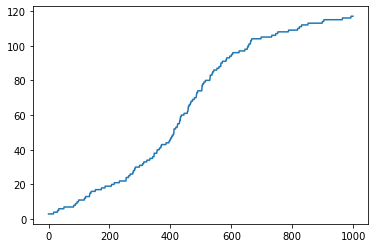

In [17]:
plt.plot(dd); 

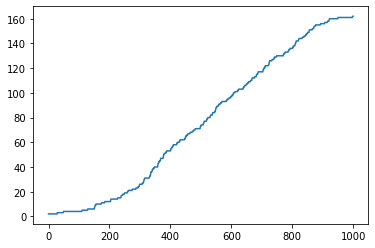

In [545]:
plt.plot(dd);  # symmetric

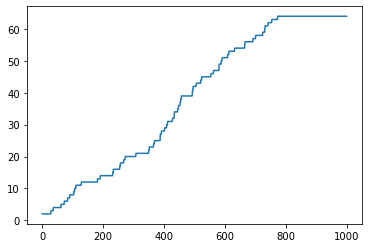

In [467]:
plt.plot(dd);  # symmetric

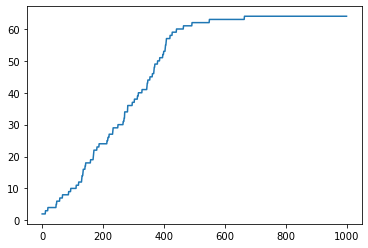

In [464]:
plt.plot(dd);  # symmetric

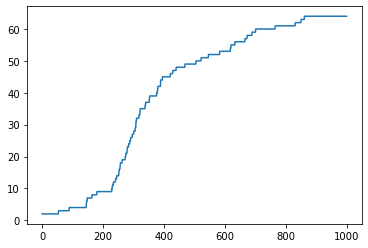

In [461]:
plt.plot(dd);

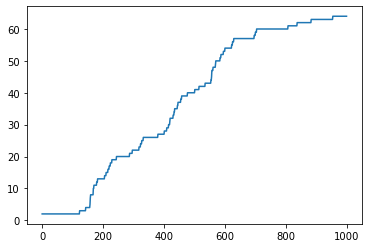

In [454]:
plt.plot(dd);

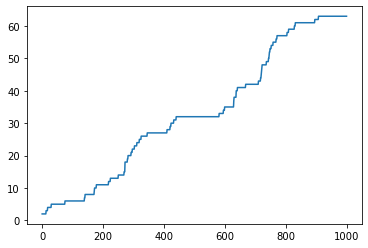

In [452]:
plt.plot(dd);

In [95]:
x = -

M = np.array([1,-x,0,-x,0,1,0,1,-x]).reshape(3,3)
np.linalg.det(M),M

(-217.00000000000003,
 array([[1, 6, 0],
        [6, 0, 1],
        [0, 1, 6]]))

In [91]:
M - np.identity(3)

array([[ 0.,  2.,  0.],
       [ 2., -1.,  1.],
       [ 0.,  1.,  1.]])

In [92]:
np.linalg.eigvals(M)

array([-1.73205081,  3.        ,  1.73205081])